In [15]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('../data/EPL-FWD-Radar_df.csv')
df1 = pd.read_csv('../data/EFL-FWD-Radar_df.csv')
pd.set_option('display.max_columns', None)

In [17]:
df = pd.concat([df, df1], axis=0)

In [ ]:
# # Filter for Forwards who have played at least 500 minutes
# mask = (df.position == 'Forward') & ((df.mins_played > 500))
# fwd_df = df.loc[mask]

In [ ]:
# # create a new column in the data to get metric per 90 minutes
# fwd_df['nineties'] = fwd_df['mins_played'] / 90
# fwd_df.head()

In [ ]:
# fwd_df['pass_completion_%'] = fwd_df['accurate_pass'] / fwd_df['total_pass']
# fwd_df['shots'] = fwd_df['attempts_ibox'] + fwd_df['attempts_obox']

In [ ]:
# # Remove non-numerical data
# all_columns = list(fwd_df.columns)
# unwanted_columns = {'player_id', 'mins_played', 'position', 'player', 'team', 'foot', 'age', 'team_id', 'nineties', 'pass_completion_%'}
# index_columns = [ele for ele in all_columns if ele not in unwanted_columns]

In [ ]:
# dfP90 = fwd_df.loc[:,index_columns].div(fwd_df['nineties'], axis=0)

In [ ]:
# # P90 Dataframe
# master_df = pd.concat([fwd_df[['player_id', 'position', 'player', 'team', 'foot', 'age', 'team_id', 'pass_completion_%']], dfP90], axis = 1)
# master_df.head(5)

In [ ]:
# # Drop columns for normalization process
# fwd_df1 = fwd_df.drop(['player_id','position','player','team','foot','age','team_id','pass_completion_%'], axis=1)

In [ ]:
# # Normalize data
# DFNom = fwd_df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [ ]:
# master_df = pd.concat([master_df[['player']], DFNom], axis = 1)
# master_df.head()

In [ ]:
# # P90 Dataframe
# last_df = pd.concat([master_df, fwd_df[['pass_completion_%']]], axis = 1)
# last_df.head(5)

In [ ]:
# # Save columns removed dataframe
# last_df.to_csv('EFL-FWD-Radar_df.csv', index=False)

In [578]:
def createRadar(player, player2):
    
    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return
    
    playerdf2 = master_df[master_df['player']==player2]
    
    if playerdf2.empty == True:
        print('DF Empty')
        return
    
    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    values += values [:1]
    
    attributes2 = list(playerdf2)[1:]
    values2 = playerdf2.iloc[0,1:].tolist()
    values2 += values2 [:1]
  
    angles = [n / 10 * 2 * pi for n in range(10)]
    angles += angles [:1]
    
    angles2 = [n / 10 * 2 * pi for n in range(10)]
    angles2 += angles2 [:1]
    
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8,8))
    plt.rcParams["font.family"] = "Gill Sans"

    plt.xticks(angles[:-1],attributes, )
    
    ax.plot(angles,values, '#1D428A', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles,values, '#1D428A', alpha=0.4)
    
    ax.plot(angles2,values2, '#FFCD00', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles2, values2, '#FFCD00', alpha=0.4)
    
    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Ensure radar goes from 0 to 1
    ax.set_ylim(0, 1)
    
    # Make the y-axis (0-1) labels smaller.
    ax.tick_params(axis='y', labelsize=12)
    yt = [20,40,60,80,100]
    ax.set_yticklabels(yt)
    
    # Number of variables we're plotting.
    num_vars = len(values)
    
    #Set position of y-labels (0-100) to be in the middle of the first two axes.
    ax.set_rlabel_position(180/10)
    
    # Add some custom styling.
    # Change the color of the circular gridlines.
    # Hide grid lines
    # Hide axes ticks
#     ax.set_xticks([])
    ax.grid(color='lightgrey',zorder=0,alpha=0.3)
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('white')
    

    circle = plt.Circle((0, 0), 0.9, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=42, zorder=0,alpha=0.2)
    circle1 = plt.Circle((0, 0), 0.5, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=43, zorder=0, alpha=0.2)
    circle2 = plt.Circle((0, 0), 0.1, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=43, zorder=0, alpha=0.2)
    plt.gca().add_artist(circle)
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)
    
#     plt.text(12,1.3,player, color='#1D428A', fontsize=25,verticalalignment='bottom', horizontalalignment='right')
#     plt.text(0.1,1.1,player2, color='#FFCD00', fontsize=25)
    plt.savefig("benrahma_radar", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

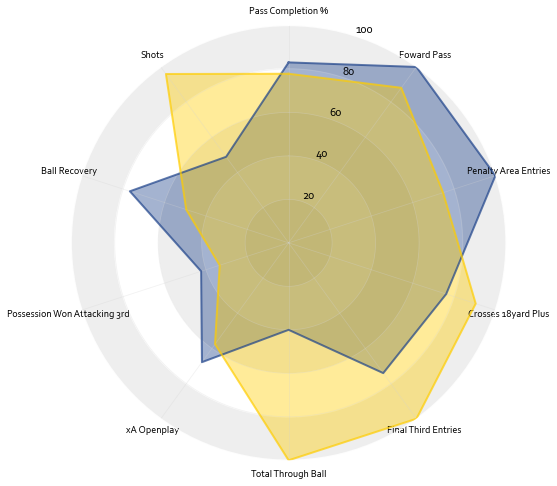

In [579]:
createRadar('Willian','Saïd Benrahma')

In [789]:
def createRadar(player, player2):

    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return
    
    playerdf2 = master_df[master_df['player']==player2]
    
    if playerdf2.empty == True:
        print('DF Empty')
        return
    
    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    values += values [:1]
    
    attributes2 = list(playerdf2)[1:]
    values2 = playerdf2.iloc[0,1:].tolist()
    values2 += values2 [:1]
  
    angles = [n / 10 * 2 * pi for n in range(10)]
    angles += angles [:1]
    
    angles2 = [n / 10 * 2 * pi for n in range(10)]
    angles2 += angles2 [:1]
    
    # Add Plot
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(8,8))
    
    plt.xticks(angles[:-1],attributes, )
    
    ax.plot(angles,values, '#1D428A', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles,values, '#1D428A', alpha=0.4)
    
    ax.plot(angles2,values2, '#FFCD00', linewidth=2, alpha=0.7,zorder=10)
    ax.fill(angles2, values2, '#FFCD00', alpha=0.4)
    
    
    # Add rotated Labels
    sections = len(attributes)
    section_width = np.deg2rad(360/sections)
    values = master_df.iloc[0,1:].tolist()

    for i in range (0,sections):
        x = (section_width*i)
        y = 1.05

        rot = np.rad2deg(x)-90

        ax.text(x, y, attributes[i], alpha=1, ha="center", va="center", rotation=rot)
    
    #Set position of y-labels (0-100) to be in the middle of the first two axes.
    ax.set_rlabel_position(90)
    
    ax.grid(color='lightgrey',zorder=0,alpha=0.4)
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('white')
    
    # Make the y-axis (0-1) labels smaller.
    ax.tick_params(axis='y', labelsize=10)
    yt = [20,40,60,80,100]
    ax.set_yticklabels(yt)
    
    labels = [item.get_text() for item in ax.get_xticklabels()]

    empty_string_labels = ['']*len(labels)
    ax.set_xticklabels(empty_string_labels)
    
    # Ensure radar goes from 0 to 100.
    ax.set_ylim(0, 1)

    
    circle = plt.Circle((0, 0), 0.9, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0,alpha=0.2)
    circle1 = plt.Circle((0, 0), 0.5, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0, alpha=0.2)
    circle2 = plt.Circle((0, 0), 0.1, transform=ax.transData._b, fill=False, edgecolor='#AAAAAA', linewidth=48, zorder=0, alpha=0.2)
    plt.gca().add_artist(circle)
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)
    
    plt.savefig("willian_radar", dip=500, bbox_inches='tight',transparent=True)
    plt.tight_layout()

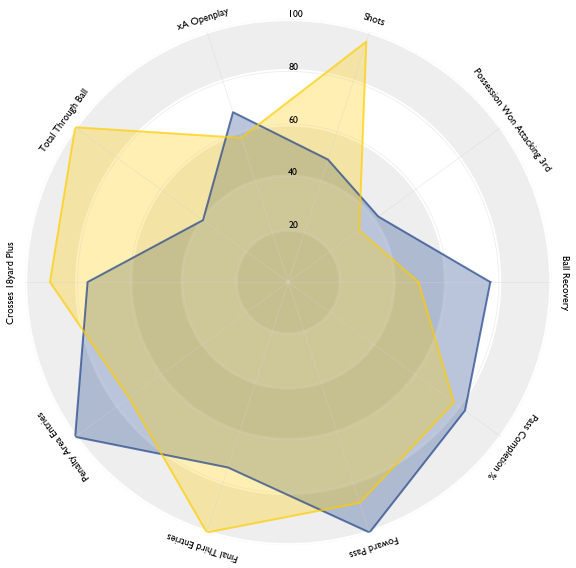

In [790]:
createRadar('Willian','Saïd Benrahma')

In [795]:
def createBar(player):
    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return

    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    
    y_pos = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(9,9))
    
    csfont = {'fontname':'Gill Sans'}
    hfont = {'fontname':'Gill Sans'}
    
        
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
   
    #Assign bars to a variable when plotting them
    bars = ax.barh(y_pos,values, linewidth=2, alpha=0.8, color='#1D428A')
    
    #Iterate through each bar, and get the number of the iteration to get the correct average from the main df
    for idx, bar in enumerate(bars):

        #Get the location of the bottom left of the bar
        y0 = bar.xy[1]
        
        #Calcuate the top left by adding the height
        y1 = y0+bar.get_height()
        
        #Plot a vertical line for the average, at the y paramaters calculated above
        plt.vlines(master_df.mean()[idx],y0,y1, color='#FFCD00')
    
    ax.text(0.02,9,"78%" ,fontsize=20,color='white')
    ax.text(0.02,8,"12.01" ,fontsize=20,color='white')
    ax.text(0.02,7,"6.05" ,fontsize=20,color='white')
    ax.text(0.02,6,"7.85" ,fontsize=20,color='white')
    ax.text(0.02,5,"1.20" ,fontsize=20,color='white')
    ax.text(0.02,4,"0.25" ,fontsize=20,color='white')
    ax.text(0.02,3,"0.29" ,fontsize=20,color='white')
    ax.text(0.02,2,"4.13" ,fontsize=20,color='white')
    ax.text(0.02,1,"0.57" ,fontsize=20,color='white')
    ax.text(0.02,0,"5.27" ,fontsize=20,color='white')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes,fontsize=20)
    
#     ax.set_title(player, fontsize=30,**csfont, fontweight='bold')
    ax.get_xaxis().set_ticks([])
    
    plt.savefig("Saïd Benrahma", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

In [796]:
master_df = df[['player','ball_recovery','poss_won_att_3rd','shots', 'expected_assists_openplay',
                     'total_through_ball', 'crosses_18yardplus',
                     'pen_area_entries','final_third_entries','fwd_pass','pass_completion_%'
                     ]]

In [797]:
master_df.rename(columns={
    'pass_completion_%': 'Pass Completion %',
    'fwd_pass': 'Foward Pass',
    'pen_area_entries': 'Penalty Area Entries',
    'crosses_18yardplus':'Crosses 18yard Plus', 
    'final_third_entries':'Final Third Entries', 
    'total_through_ball':'Total Through Ball',
    'expected_assists_openplay':'xA Openplay',
    'poss_won_att_3rd':'Possession Won Attacking 3rd',
    'ball_recovery':'Ball Recovery',
    'shots':'Shots'
}, inplace=True)

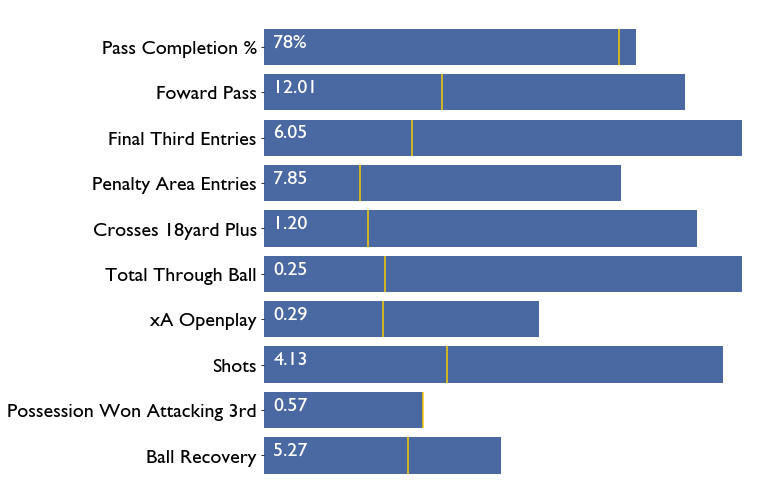

In [798]:
createBar('Saïd Benrahma')

In [793]:
def createBar(player):
    # Filter df 
    playerdf = master_df[master_df['player']==player]
    
    if playerdf.empty == True:
        print('DF Empty')
        return

    attributes = list(playerdf)[1:]
    values = playerdf.iloc[0,1:].tolist()
    
    y_pos = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(9,9))
    
    csfont = {'fontname':'Gill Sans'}
    hfont = {'fontname':'Gill Sans'}
    
        
    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
   
    #Assign bars to a variable when plotting them
    bars = ax.barh(y_pos,values, linewidth=2, alpha=0.8, color='#1D428A')
    
    #Iterate through each bar, and get the number of the iteration to get the correct average from the main df
    for idx, bar in enumerate(bars):

        #Get the location of the bottom left of the bar
        y0 = bar.xy[1]
        
        #Calcuate the top left by adding the height
        y1 = y0+bar.get_height()
        
        #Plot a vertical line for the average, at the y paramaters calculated above
        plt.vlines(master_df.mean()[idx],y0,y1, color='#FFCD00')
    
    ax.text(0.02,9,"83%" ,fontsize=20,color='white')
    ax.text(0.02,8,"10.79" ,fontsize=20,color='white')
    ax.text(0.02,7,"3.83" ,fontsize=20,color='white')
    ax.text(0.02,6,"8.45" ,fontsize=20,color='white')
    ax.text(0.02,5,"0.75" ,fontsize=20,color='white')
    ax.text(0.02,4,"0.19" ,fontsize=20,color='white')
    ax.text(0.02,3,"0.18" ,fontsize=20,color='white')
    ax.text(0.02,2,"2.43" ,fontsize=20,color='white')
    ax.text(0.02,1,"0.56" ,fontsize=20,color='white')
    ax.text(0.02,0,"5.56" ,fontsize=20,color='white')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(attributes,fontsize=20)
    
#     ax.set_title(player, fontsize=30,**csfont, fontweight='bold')
    ax.get_xaxis().set_ticks([])
    
    plt.savefig("Willian", dip=500, bbox_inches='tight',transparent=True)
    plt.show()

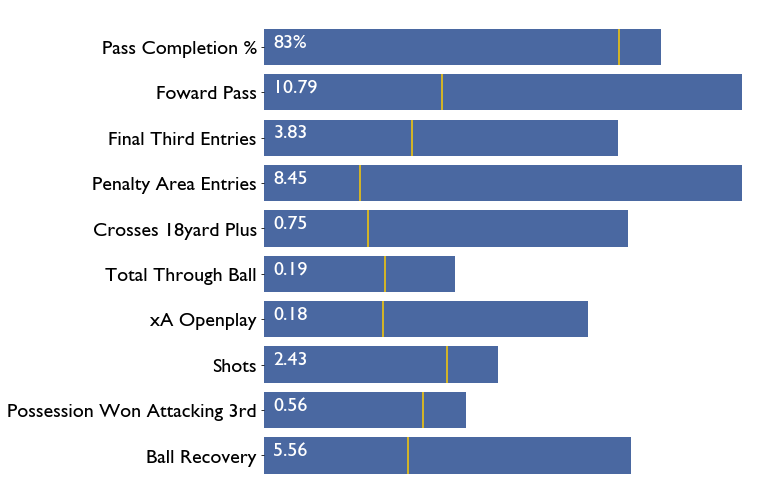

In [794]:
createBar('Willian')